In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# INWARD REMITTANCES (receiving, incoming)

In [2]:
inrem = pd.read_excel('inward_remit.xlsx')
inrem.sample(5)

,Migrant remittance inflows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021e,Remittances as a share of GDP in 2021e (%)
27,Brunei Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
106,Lao PDR,NaN,NaN,NaN,NaN,2.800000,3.500000,3.700000,3.500000,6.700000,...,170.436768,188.048240,189.212314,189.361894,242.708578,239.879527,296.516567,232.166104,213.449813,1.101676
120,Mali,59.399974,47.657347,39.408867,36.476617,32.497502,66.998623,68.436604,88.175628,73.225215,...,894.509061,920.264926,816.601762,826.680971,883.257574,1022.074241,1022.074241,987.299901,973.477702,4.976117
149,Papua New Guinea,5.445909,4.737266,6.099514,4.313143,5.354969,5.607313,7.007307,13.434067,10.012715,...,14.280890,10.474115,3.944548,2.694280,4.262317,3.670806,3.000000,2.000000,2.5,0.009448
5,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.637411,30.971119,11.114712,3.988048,1.418196,1.579247,3.445473,8.053051,6.845093,0.009732


In [3]:
inrem = inrem[:216]
inrem = inrem[:216]
inrem = inrem.dropna(how='all')
inrem0 = inrem.replace(np.nan, 0)
inrem0 = inrem0.rename(columns={"Migrant remittance inflows (US$ million)": "inflow_country", "Remittances as a share of GDP in 2021e (%)": "remit_gdp"}).set_index('inflow_country').replace(' ', np.nan)
# rename country column, rename %GDP column, set country column as index, replace empty value with Nan
inrem0['total_rem'] = inrem0.sum(axis=1)
# add column for aggregate remittances

In [4]:
inrem0.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem
inflow_country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,627.710802,3.117356,6458.398367
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1600.000000,9.540847,31937.846673
Algeria,406.0,447.0,507.0,392.0,329.0,313.0,358.0,487.0,379.0,345.0,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1.073850,21545.679823
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Countries RECEIVING the most remittances

In [5]:
inrem_countries = inrem0.sort_values('total_rem', ascending=False)[2:]
inrem_countries = inrem_countries.drop('remit_gdp', axis=1).drop('total_rem', axis=1)
inrem_countries.head(5)
inrem0.sort_values('total_rem', ascending=False)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem
inflow_country,,,,,,,,,,,,,,,,,,,,,
World,35813.937460,34887.164670,36041.330782,36578.391327,35361.109730,34555.884065,40459.240711,48817.480848,52361.348036,54748.824382,...,610015.043278,602121.638664,597318.203813,640378.213555,695090.732980,722244.860532,705516.718911,751238.058819,0.000000,1.147431e+07
Low-and Middle-Income Countries,17624.196399,17847.553011,19286.015387,20848.040546,20161.127323,19346.194635,19692.453998,22543.260364,22379.180077,24363.839815,...,450419.595020,452727.113110,447484.812738,485176.048041,532353.960391,559012.409828,549419.052156,589495.322224,0.000000,8.122839e+06
India,2761.280685,2301.890115,2621.913836,2662.479622,2293.065837,2472.285487,2243.013880,2663.469748,2316.724191,2609.857302,...,70388.642797,68909.693353,62744.364090,68967.175500,78790.170929,83332.078002,83149.172934,87000.000000,2.953096,1.216372e+06
China,0.000000,0.000000,616.000000,542.000000,403.000000,271.000000,407.000000,166.000000,129.000000,76.000000,...,62332.342308,63937.646592,60999.999488,63875.674112,67413.592064,68398.475114,59506.673349,53000.000000,0.314298,9.366408e+05
Mexico,1039.000000,1220.000000,1226.000000,1391.000000,1564.000000,1619.000000,1771.000000,1987.000000,2442.000000,2790.000000,...,24802.081325,26233.171803,28690.957406,32270.507679,35768.416627,39021.789685,42878.274907,52742.962524,4.102857,6.268239e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Korea, Dem. Rep.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Monaco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Cuba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00


### Top 10 Remittance Receiving Countries

Top 10 Receiving Countries are: Index(['India', 'China', 'Mexico', 'Philippines', 'France', 'Egypt, Arab Rep.',
       'Nigeria', 'Germany', 'Pakistan', 'Bangladesh'],
      dtype='object', name='inflow_country')


<AxesSubplot:title={'center':'Countries Receiving the Most Remit. Overall'}, xlabel='Inflow Country', ylabel='Total Remittances (1e12)'>

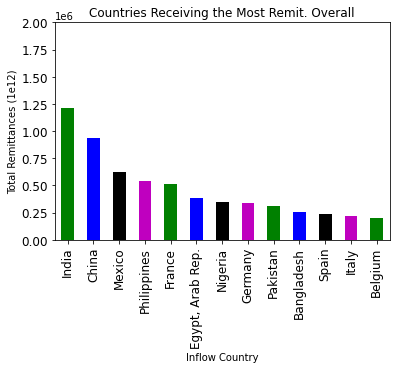

In [6]:
print('Top 10 Receiving Countries are:', (inrem_countries.index[:10]))
inrem0.index.name = 'Inflow Country'
plt.axes(title='Countries Receiving the Most Remit. Overall', xlabel=inrem0.index.name, ylabel='Total Remittances (1e12)', ylim=(0,2000000))

inrem0.sort_values('total_rem', ascending=False).total_rem[2:15].plot(kind='bar', color=['g','b','k','m'], fontsize=12)

### Top Remittance Receivers (1-5, 6-10, 11-15)

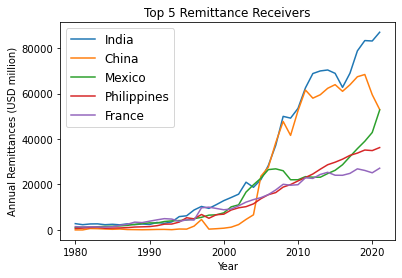

In [7]:
plt.axes(title='Top 5 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(5):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best', fontsize=12)

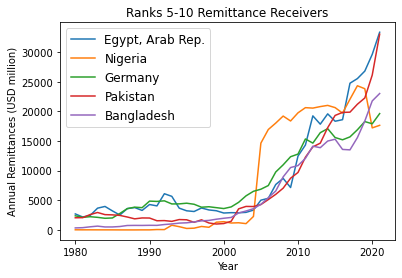

In [8]:
plt.axes(title='Ranks 5-10 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(5,10):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best', fontsize=12)

In [9]:
plt.axes(title='Top 15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(10, 15):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best')
plt.close()    # close fig

### Top 20 Remittance Receivers

In [10]:
plt.axes(title='Top 15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(10, 15):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best')
plt.close()    # close fig

In [11]:
inrem1 = inrem0.sort_values('total_rem', ascending=False)
inrem1 = inrem1[2:]
inrem1['total_rem'].plot(x='inflow_country', y='total_rem', kind='bar')
plt.close()    # close fig

# Percent of GDP from Remittances (top 10)

In [12]:
pd.to_numeric(inrem1.remit_gdp)
inrem1 = inrem1.sort_values('remit_gdp', ascending=False)
inrem1['pct_gdp'] = inrem1.remit_gdp / 100
inrem1.sort_values('remit_gdp', ascending=False).head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem,pct_gdp
Inflow Country,,,,,,,,,,,,,,,,,,,,,
Tonga,0.00,0.00,8.119320,16.475310,13.463839,21.871344,20.869981,22.388044,16.612133,14.867724,...,129.278119,126.233535,158.602601,183.435146,190.366330,190.551243,220.063108,43.924772,2622.657828,0.439248
South Sudan,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1138.720000,1083.000000,633.830000,1267.160000,700.000000,1200.000000,1236.000000,37.879252,7298.589252,0.378793
Lebanon,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7480.817047,7605.729645,7061.853364,6977.962174,7409.908589,6633.293860,6612.700000,34.789036,128550.685419,0.347890
"Gambia, The",0.00,0.00,0.187813,0.701136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,135.963871,207.369236,228.181209,203.603173,275.477908,416.400000,689.200000,33.751224,3190.014917,0.337512
Somalia,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1482.000000,1577.000000,1735.000000,1735.000000,31.987463,6560.987463,0.319875
Kyrgyz Republic,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1687.701982,1994.607958,2485.778060,2688.570122,2410.507185,2422.824642,2450.000000,30.061350,29691.732227,0.300613
Tajikistan,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2258.643220,1867.398638,2237.179088,2183.340531,2321.884645,2186.807504,2250.000000,27.764067,37753.891106,0.277641
Honduras,1.60,1.75,1.500000,1.800000,1.950000,2.100000,2.100000,33.700000,41.800000,48.600000,...,3666.201327,3863.739159,4322.761614,4776.545983,5401.465665,5588.646521,7000.000000,26.590693,67031.197416,0.265907
El Salvador,49.04,72.48,112.200000,115.440000,158.920000,156.960000,157.733963,186.240000,210.360000,237.680000,...,4274.620676,4561.580071,4996.353545,5391.738702,5661.160275,5936.157615,7262.050000,26.249955,95801.342102,0.262500


<AxesSubplot:title={'center':'Percent of GDP from Remittances (Top 10)'}, xlabel='Inflow Country', ylabel='% GDP from Remittances (2021e)'>

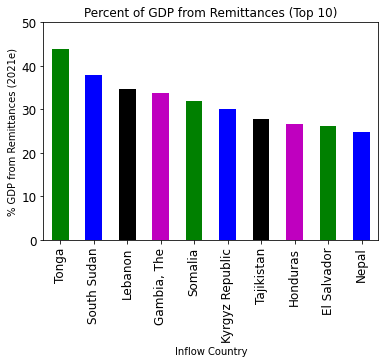

In [13]:
pd.to_numeric(inrem1.remit_gdp)
inrem1 = inrem1.sort_values('remit_gdp', ascending=False)
inrem1['pct_gdp'] = inrem1.remit_gdp / 100
inrem1.remit_gdp.head(10).plot(kind='bar', color=['g','b','k','m'], title='Percent of GDP from Remittances (Top 10)', xlabel='Inflow Country', ylabel='% GDP from Remittances (2021e)', ylim=(0,50), fontsize=12)

In [14]:
foo = inrem0.sort_values('remit_gdp', ascending=False).head(10)
foo = pd.DataFrame(foo.loc[:,'remit_gdp'])
foo = foo.reset_index()    # creating clean x and y columns
foo

,Inflow Country,remit_gdp
0,Tonga,43.924772
1,South Sudan,37.879252
2,Lebanon,34.789036
3,"Gambia, The",33.751224
4,Somalia,31.987463
5,Kyrgyz Republic,30.061350
6,Tajikistan,27.764067
7,Honduras,26.590693
8,El Salvador,26.249955
9,Nepal,24.806654


In [15]:
foo.plot(x='Inflow Country', y='remit_gdp', kind='area')
plt.close()    # close fig

### Top 20 Countries with Remittance as GDP

In [16]:
inrem1.sort_values('remit_gdp', ascending=False).remit_gdp[:20].plot(kind='bar', color=['g','b','k','m'])
plt.close()    # close fig

# OUTWARD REMITTANCES (sending, outgoing)

In [17]:
outrem = pd.read_excel('outward_remit.xlsx')
outrem.sample(10)
outrem = outrem[:215]
outrem = outrem.dropna(how='all')
outrem0 = outrem.replace(np.nan, 0)
outrem0['total_rem'] = outrem0.sum(axis=1)
outrem0.sample(5)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_5183/158692972.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outrem0['total_rem'] = outrem0.sum(axis=1)


,Outward remittance flows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
116,Madagascar,31.238352,23.331948,20.100886,12.196562,10.647845,14.430679,16.308345,11.90595,13.844011,...,63.112378,55.195670,49.749229,57.976275,47.656922,63.489593,74.265374,63.243734,49.908653,1154.602316
126,"Micronesia, Fed. Sts.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,17.913900,16.452600,17.330800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.578900
188,Tanzania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,162.402671,129.703911,98.283105,103.818118,108.374756,115.061282,99.054685,87.214900,0.000000,1516.260637
143,Northern Mariana Islands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
156,Qatar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,10412.912088,11281.043956,11230.219780,12192.032967,11981.868132,12759.340659,11557.967033,11963.736264,10743.681319,115826.783627


# Countries SENDING the most remittances

In [18]:
send_countries = outrem0.rename(columns={'Outward remittance flows (US$ million)': 'outflow_country'})
send_countries.outflow_country.iloc[0]    # missing replace Nan label with 'World' code
send_countries = send_countries.set_index('outflow_country').sort_values('total_rem',ascending=False)[1:]
send_countries.head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
outflow_country,,,,,,,,,,,,,,,,,,,,,
United States,1360.0,4720.0,5140.0,5450.0,5990.0,6330.0,8660.0,8810.0,9010.0,10220.0,...,52371.000000,55003.000000,57239.000000,60719.000000,62870.000000,64114.000000,66836.000000,71372.000000,69918.000000,1.399133e+06
Saudi Arabia,4090.0,5350.0,5350.0,5240.0,5280.0,5200.0,4800.0,4930.0,6500.0,8530.0,...,29492.573333,34984.186667,36924.240000,38787.368000,37843.205333,36118.961653,33881.511795,31197.048533,34595.847461,7.422887e+05
Switzerland,2343.0,2330.0,2759.0,2688.0,2475.0,2509.0,3780.0,5040.0,5760.0,6110.0,...,23738.994076,25337.903098,26816.952603,26031.157291,26050.038249,26936.091305,27721.355447,28390.490905,29403.688397,5.132056e+05
Germany,5826.0,4794.0,4481.0,4291.0,4042.0,3601.0,4632.0,5534.0,5872.0,5485.0,...,15581.428609,19976.705775,20084.390152,18248.805576,19348.107340,21699.115805,24351.171161,23935.924317,22024.495026,4.792461e+05
United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14398.000000,17933.000000,19280.000000,40701.974132,43774.812798,44752.620830,46084.955752,44976.174268,43240.299523,4.075957e+05
Russian Federation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31647.700000,37216.680000,32640.360000,19688.840000,16244.420000,20610.140000,22308.420000,22217.240000,16872.180000,3.846105e+05
France,5070.0,4670.0,4340.0,4110.0,3840.0,4170.0,5150.0,5760.0,6393.0,5571.0,...,12561.160243,13424.774110,13729.849894,12791.549841,13284.455662,13798.960223,15022.558190,15059.012742,14632.716778,3.440113e+05
Kuwait,692.0,689.0,875.0,865.0,963.0,1040.0,1080.0,1100.0,1180.0,1280.0,...,15459.199374,17711.480681,18128.476350,15202.536401,15287.570250,13760.108803,14346.861711,18855.161641,17357.178323,2.404433e+05
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1581.0,1624.0,1735.0,...,10077.435197,10528.125662,11571.027572,10705.712114,10190.899107,9801.235337,10410.041124,10360.300797,9382.380085,2.236567e+05


### Top 10 Remittance Sending Countries

<AxesSubplot:xlabel='Sending Country', ylabel='Total Remittances (USD 1e12)'>

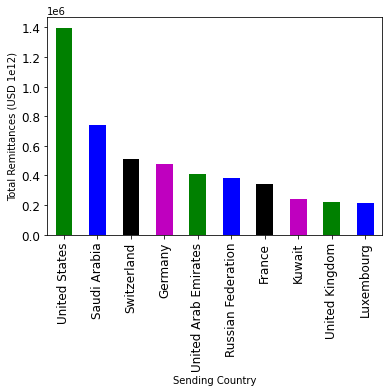

In [19]:
send_countries.total_rem.head(10).plot(kind='bar', color=['g','b','k','m'], fontsize=12, xlabel='Sending Country', ylabel='Total Remittances (USD 1e12)')

### Top SENDERS (1-5), (6-10), (11-15)

In [20]:
send_countries = send_countries.drop('total_rem', axis=1)
# dropping aggregate column so it doesn't create outlier in trendline

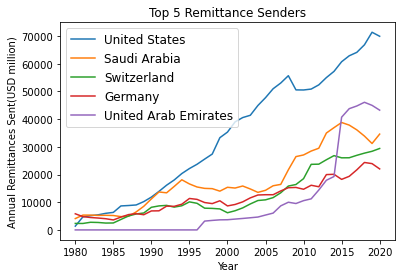

In [21]:
plt.axes(title='Top 5 Remittance Senders', xlabel='Year', ylabel='Annual Remittances Sent(USD million)')
for i in range(5):
    send_countries.iloc[i].plot()
plt.legend(loc='best', fontsize=12)

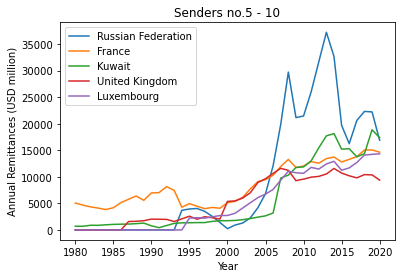

In [22]:
plt.axes(title='Ranks 5-10 Remittance Senders', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(5,10):
    send_countries.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Senders no.5 - 10')

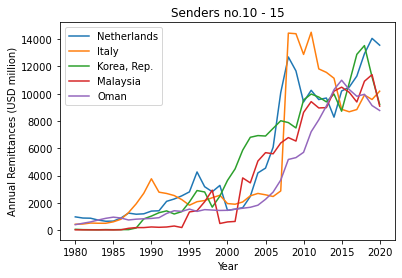

In [23]:
plt.axes(title='Ranks 11-15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(10,15):
    send_countries.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Senders no.10 - 15')
    

In [24]:
plt.close('all')

In [25]:
import geonamescache
import ast
gc = geonamescache.GeonamesCache()
countries = pd.DataFrame(gc.get_countries()).T
continents = pd.DataFrame(gc.get_continents()).T

#### not useful code
file = open('data/iso3166.json')
file = file.read()
iso3166 = ast.literal_eval(file)

diction = pd.DataFrame(pd.Series(iso3166)).rename(columns={0:'country'})
diction = pd.DataFrame(diction['country'].str.lower())
diction = pd.DataFrame(diction['country'].str.title())
inrem0

# Global / Regional Remittance INFLOWS Analysis

In [46]:
continents = continents.rename(columns={'continentCode': 'continentcode'})
# cleaning up column to merge on so it matches
mapp = pd.merge(countries, continents, on='continentcode', how='left')
# mapping countries onto continents dictionary
mapp = mapp.rename(columns={'name_x': 'Inflow Country'})
# renaming to match col in next merge
mapp2 = mapp[['Inflow Country', 'continentcode', 'capital', 'population_x', 'currencycode', 'languages', 'geonameid']]
# selecting data columns from mapp I want in order to map continent codes (& other data) onto WB dataset
in_global = inrem0.merge(mapp2, on='Inflow Country', how='left')

#### Isolating countries with null continent codes to match them

In [47]:
null_cont = in_global[['Inflow Country', 'continentcode']]
null_cont.continentcode.isna().describe()
# 35 uncategorized countries
null_cont['null'] = null_cont['continentcode'].isna()
null_cont = null_cont.sort_values('null', ascending=False)[1:35]
# creating df to identify countries with null continentcode. will update their values in broader df

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_5183/1046373033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_cont['null'] = null_cont['continentcode'].isna()


In [48]:
null_cont.index
in_global.at[105, 'continentcode'] = 'AS'
in_global.at[128, 'continentcode'] = 'OC'
in_global.at[211, 'continentcode'] = 'AS'
in_global.at[13, 'continentcode'] = 'CB'
in_global.at[210, 'continentcode'] = 'AS'
in_global.at[209, 'continentcode'] = 'CB'
in_global.at[102, 'continentcode'] = 'AS'
in_global.at[101, 'continentcode'] = 'AS'
in_global.at[106, 'continentcode'] = 'AS'
in_global.at[207, 'continentcode'] = 'SA'
in_global.at[70, 'continentcode'] = 'AF'
in_global.at[190, 'continentcode'] = 'AS'
in_global.at[158, 'continentcode'] = 'EU'
in_global.at[64, 'continentcode'] = 'EU'
in_global.at[62, 'continentcode'] = 'AF'
in_global.at[57, 'continentcode'] = 'AF'
in_global.at[169, 'continentcode'] = 'CB'
in_global.at[170, 'continentcode'] = 'EU'
in_global.at[84, 'continentcode'] = 'AS'
in_global.at[142, 'continentcode'] = 'EU'
in_global.at[46, 'continentcode'] = 'AF'
in_global.at[89, 'continentcode'] = 'AS'
in_global.at[44, 'continentcode'] = 'AF'
in_global.at[43, 'continentcode'] = 'AF'
in_global.at[178, 'continentcode'] = 'CB'
in_global.at[179, 'continentcode'] = 'CB'
in_global.at[180, 'continentcode'] = 'CB'
in_global.at[181, 'continentcode'] = 'CB'
in_global.at[38, 'continentcode'] = 'EU'
in_global.at[186, 'continentcode'] = 'AS'
in_global.at[31, 'continentcode'] = 'AF'
in_global.at[27, 'continentcode'] = 'AS'

dict = {
    'AS': 'Asia',
    'AF': 'Africa',
    'SA': 'South America',
    'NA': 'North America',
    'EU': 'Europe',
    'OC': 'Oceania',
    'CB': 'Caribbean'
}
in_global['continent'] = in_global.continentcode.map(dict)

## Categories for Eastern Eu & Central Asia (ECA), East Asia & Pacific (EAP), South Asia (SAS), Western Eu (WEU), Latin Am & Caribbean (LAC), Middle East & North Af (MENA), North Am (NA), Eastern & Southern Africa (ESAF), West & Central Af (WCAF)
### According to UNICEF global classifications (https://data.unicef.org/regionalclassifications/)

In [56]:
reg = {
    'EUCA': 'Eastern Eu & Central Asia',
    'EAP': 'East Asia & Pacific',
    'SAS': 'South Asia',
    'WEU': 'Western Eu',
    'LAC': 'Latin Am & Caribbean',
    'MENA': 'Middle East & North Af',
    'ESAF': 'Eastern & Southern Africa',
    'WCAF': 'West & Central Af'}

EUCA = 'Albania; Armenia; Azerbaijan; Belarus; Bosnia and Herzegovina; Bulgaria; Croatia; Georgia; Kazakhstan; Kyrgyzstan; Montenegro; Republic of Moldova; Romania; Russian Federation; Serbia; Tajikistan; Macedonia; Turkey; Turkmenistan; Ukraine; Uzbekistan'
EUCA = EUCA.replace(';', ',')
EUCA = EUCA.split(',')
EUCA = pd.DataFrame(EUCA).rename(columns={0: 'Country'})
EUCA.insert(loc=1, column='Region', value='EUCA')

EAP = 'Australia; Brunei Darussalam; Cambodia; China; Cook Islands; Democratic People’s Republic of Korea; Fiji; Indonesia; Japan; Kiribati; Lao People’s Democratic Republic; Malaysia; Marshall Islands; Micronesia; Mongolia; Myanmar; Nauru; New Zealand; Niue; Palau; Papua New Guinea; Philippines; Republic of Korea; Samoa; Singapore; Solomon Islands; Thailand; Timor-Leste; Tokelau ; Tonga; Tuvalu; Vanuatu; Vietnam'
EAP = EAP.replace(';', ',')
EAP = EAP.split(',')
EAP = pd.DataFrame(EAP).rename(columns={0: 'Country'})
EAP.insert(loc=1, column='Region', value='EAP')


SAS = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
SAS = pd.DataFrame(SAS).rename(columns={0: 'Country'})
SAS.insert(loc=1, column='Region', value='SAS')


WEU = 'Andorra; Austria; Belgium; Cyprus; Czechia; Denmark; Estonia; Finland; France; Germany; Greece; Holy See; Hungary; Iceland; Ireland; Italy; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Netherlands; Norway; Poland; Portugal; San Marino; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom'
WEU = WEU.replace(';', ',')
WEU = WEU.split(',')
WEU = pd.DataFrame(WEU).rename(columns={0: 'Country'})
WEU.insert(loc=1, column='Region', value='WEU')


LAC = 'Anguilla; Antigua and Barbuda; Argentina; Bahamas; Barbados; Belize; Bolivia; Brazil; British Virgin Islands; Chile; Colombia; Costa Rica; Cuba; Dominica; Dominican Republic; Ecuador; El Salvador; Grenada; Guatemala; Guyana; Haiti; Honduras; Jamaica; Mexico; Montserrat; Nicaragua; Panama; Paraguay; Peru; Saint Kitts and Nevis; Saint Lucia; Saint Vincent and the Grenadines; Suriname; Trinidad and Tobago; Turks and Caicos Islands; Uruguay; Venezuela'
LAC = LAC.replace(';', ',')
LAC = LAC.split(',')
LAC = pd.DataFrame(LAC).rename(columns={0: 'Country'})
LAC.insert(loc=1, column='Region', value='LAC')


MENA = 'Algeria; Bahrain; Egypt, Arab Rep.; Iran; Iraq; Israel; Jordan; Kuwait; Lebanon; Libya; Morocco; Oman; Qatar; Saudi Arabia; State of Palestine; Syrian Arab Republic; Tunisia; United Arab Emirates; Yemen'
MENA = MENA.replace(';', ',')
MENA = MENA.split(',')
MENA = pd.DataFrame(MENA).rename(columns={0: 'Country'})
MENA.insert(loc=1, column='Region', value='MENA')


NA = ['Canada', 'United States']
NA = pd.DataFrame(NA).rename(columns={0: 'Country'})
NA.insert(loc=1, column='Region', value='NA')


ESAF = 'Angola; Botswana; Burundi; Comoros; Djibouti; Eritrea; Ethiopia; Kenya; Lesotho; Madagascar; Malawi; Mauritius; Mozambique; Namibia; Rwanda; Seychelles; Somalia; South Africa; South Sudan; Sudan; Swaziland; Uganda; United Republic of Tanzania; Zambia; Zimbabwe'
ESAF = ESAF.replace(';', ',')
ESAF = ESAF.split(',')
ESAF = pd.DataFrame(ESAF).rename(columns={0: 'Country'})
ESAF.insert(loc=1, column='Region', value='ESAF')


WCAF = 'Benin; Burkina Faso; Cabo Verde; Cameroon; Central African Republic; Chad; Congo; Côte d’Ivoire; Democratic Republic of the Congo; Equatorial Guinea; Gabon; Gambia; Ghana; Guinea; Guinea-Bissau; Liberia; Mali; Mauritania; Niger; Nigeria; Sao Tome and Principe; Senegal; Sierra Leone; Togo'
WCAF = WCAF.replace(';', ',')
WCAF = WCAF.split(',')
WCAF = pd.DataFrame(WCAF).rename(columns={0: 'Country'})
WCAF.insert(loc=1, column='Region', value='WCAF')


In [96]:
regions = [EUCA, EAP, SAS, WEU, LAC, MENA, NA, ESAF, WCAF]
regions = pd.concat(regions)
regions = regions.rename(columns={'Country': 'Inflow Country'})


In [99]:
# did not merge countries properly
in_global2 = in_global.merge(regions, on='Inflow Country', how='left')
in_global2
in_global2.Region.isna().describe()

count      216
unique       2
top       True
freq       200
Name: Region, dtype: object

In [100]:
in_global2[:20]

,Inflow Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,remit_gdp,total_rem,continentcode,capital,population_x,currencycode,languages,geonameid,continent,Region
0,Afghanistan,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.117356,6458.398367,AS,Kabul,29121286,AFN,"fa-AF,ps,uz-AF,tk",1149361,Asia,SAS
1,Albania,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.540847,31937.846673,EU,Tirana,2986952,ALL,"sq,el",783754,Europe,EUCA
2,Algeria,406.00000,447.000000,507.000000,392.00000,329.000000,313.000000,358.000000,487.000000,379.000000,...,1.073850,21545.679823,AF,Algiers,34586184,DZD,ar-DZ,2589581,Africa,MENA
3,American Samoa,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,OC,Pago Pago,57881,USD,"en-AS,sm,to",5880801,Oceania,NaN
4,Andorra,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,EU,Andorra la Vella,84000,EUR,ca,3041565,Europe,WEU
5,Angola,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009732,250.013725,AF,Luanda,13068161,AOA,pt-AO,3351879,Africa,ESAF
6,Antigua and Barbuda,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,11.185185,11.744444,12.337037,...,1.758435,617.295211,NA,St. John's,86754,XCD,en-AG,3576396,North America,NaN
7,Argentina,56.00000,42.000000,28.000000,28.00000,32.000000,27.000000,32.000000,34.000000,0.000000,...,0.211159,11688.472514,SA,Buenos Aires,41343201,ARS,"es-AR,en,it,de,fr,gn",3865483,South America,NaN
8,Armenia,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.024170,29312.610399,AS,Yerevan,2968000,AMD,hy,174982,Asia,NaN
9,Aruba,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.314463,335.899945,NA,Oranjestad,71566,AWG,"nl-AW,es,en",3577279,North America,NaN


In [88]:

# updated DataFrame with regional values
in_global2['Inflow Country'].map(regions['Country'])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

## Total Remittances Received by Continent

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem
continentcode,,,,,,,,,,,,,,,,,,,,,
AS,11107.871661,11668.902939,13260.733049,13458.494488,12570.881017,12316.917783,13093.529901,14134.692231,13966.269871,15579.833476,...,297870.855809,297095.202815,290363.604555,303542.130279,328245.323222,342825.012848,335172.418023,342696.647150,255.821678,5.081761e+06
EU,15981.424019,14428.235011,14201.015197,12968.228806,12345.735189,12341.763766,16142.057571,20614.949521,23356.789181,23188.662648,...,162151.162191,151476.876400,152633.303994,163804.702849,176999.826846,180028.503063,170254.432242,178407.533432,123.777232,3.244867e+06
NA,1673.340000,1903.630000,1931.106667,2067.303333,2300.186667,2492.146122,3460.167296,3915.356666,4515.543741,5026.295577,...,59515.596883,62735.243329,66896.065952,73644.253832,80767.835783,87596.298246,92783.464770,111480.376494,170.183986,1.373679e+06
AF,5800.448584,5452.055744,5309.382555,6649.746688,6658.073878,5852.220125,5754.957120,7480.790656,7482.471383,7180.508020,...,70706.985124,70171.648236,66337.015663,76897.629312,85239.784755,87061.716425,83581.039996,91682.295722,272.588459,1.294437e+06
SA,332.500000,399.900000,222.400000,175.366667,195.309895,199.100000,514.800000,737.900000,523.300000,639.300000,...,14736.551138,15869.921950,16427.463956,17885.023793,19345.282052,20378.082242,20132.711097,23339.723064,25.720293,3.574540e+05
OC,917.560604,1033.329865,1115.593314,1257.451345,1289.611973,1352.673304,1451.358452,1886.932515,2473.996082,3084.276514,...,4825.896990,4566.590932,4465.168608,4409.876337,4302.680796,4216.684441,3458.125440,3503.482956,105.049470,1.190649e+05
CB,0.792593,1.111111,1.100000,1.800000,1.311111,1.062963,42.370371,46.859259,42.977778,49.948148,...,162.867598,161.712925,166.740767,167.494014,166.573316,117.316020,102.290392,94.000000,5.054605,3.218338e+03


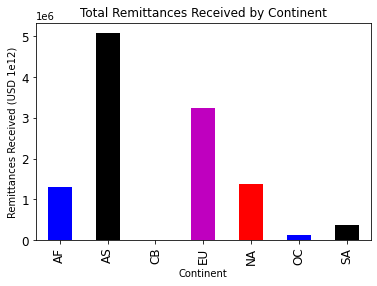

In [32]:
cont = in_global.groupby('continentcode').sum()
cont.total_rem.plot(kind='bar', title='Total Remittances Received by Continent', xlabel='Continent', ylabel='Remittances Received (USD 1e12)', fontsize=12, color=['b','k','g','m','r'])
cont.sort_values('total_rem', ascending=False)

## Top 15 Receivers in 2020

,Inflow Country,2020
87,India,83149.172934
40,China,59506.673349
125,Mexico,42878.274907
152,Philippines,34913.342999
57,"Egypt, Arab Rep.",29602.900000
146,Pakistan,26108.000000
67,France,25141.879667
15,Bangladesh,21749.701161
72,Germany,17898.798739
141,Nigeria,17207.547306


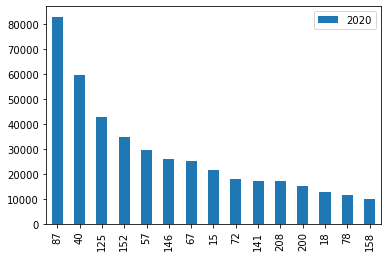

In [33]:
top2020 = in_global.sort_values(2020, ascending=False)[2:]
top2020 = top2020[['Inflow Country', 2020]]
top2020[:15].plot(kind='bar')
top2020.head(15)

## Top 15 Receivers in 2019

,Inflow Country,2019
87,India,83332.078002
40,China,68398.475114
125,Mexico,39021.789685
152,Philippines,35167.471832
57,"Egypt, Arab Rep.",26781.400000
67,France,26173.645645
141,Nigeria,23809.281401
146,Pakistan,22252.000000
15,Bangladesh,18363.859531
72,Germany,18271.041363


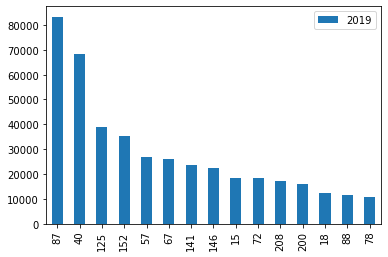

In [34]:
top2019 = in_global.sort_values(2019, ascending=False)[2:]
top2019 = top2019[['Inflow Country', 2019]]
top2019[:15].plot(kind='bar')
top2019.head(15)

### Ukraine probe

In [35]:
inrem0.drop(['remit_gdp', 'total_rem'], axis=1).iloc[200].plot()
inrem0.xs('Ukraine')[2020]
plt.close('all')    # close fig

## Asia

(0.0, 10.0)

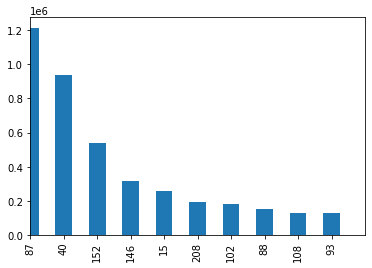

In [36]:
asia = in_global.loc[in_global.continentcode == 'AS']
asia = asia.sort_values('total_rem', ascending=False)
asia.total_rem[:10].plot(kind='bar')
l,r = plt.xlim()
l,r
plt.xlim([0,10])

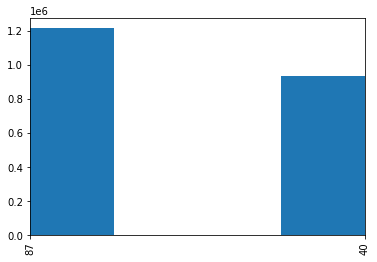

In [37]:
# trying to change axis labels of above graphs to respective countries
asia.total_rem[:8].plot(kind='bar')
plt.xlim([asia['Inflow Country'].iloc[0], asia['Inflow Country'].iloc[8]])
plt.xlim?


<AxesSubplot:>

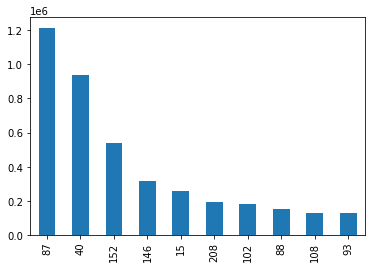

In [38]:
asia.total_rem[:10].plot(kind='bar')

In [39]:
plt.close('all')
# overlap between senders and receivers
# what are the top migrant groups in SEDING countries

## Latin America & Caribbean

In [40]:
asia = in_global.loc[in_global.continentcode == 'AS']
asia = asia.sort_values('total_rem', ascending=False)

## Africa

In [41]:
africa = in_global.loc[in_global.continentcode == 'AF']
africa = africa.sort_values('total_rem', ascending=False)
africa
in_global['Egypt, Arab Rep.']

KeyError: 'Egypt, Arab Rep.'

### 